# Change Plot

## Time Series Plot

### Step 1 : Initialize Global Setting

In [5]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.patches as patches
import squarify
import random

from statsmodels.tsa.seasonal import seasonal_decompose
# Setting up the params
large = 22
med =16
small= 12

params = {
    'axes.titlesize':large,
    'legend.fontsize':med,
    'figure.figsize':(16,10),
    'axes.labelsize':med,
    'xtick.labelsize':med,
    'ytick.labelsize':med,
    'figure.titlesize':large
    
}

#override default parameters of plot

plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')




### Step 2 :  Import dataset 

In [6]:
df=pd.read_csv("https://raw.githubusercontent.com/mukesh-ranjan/LearnDataAnalysisFromScratch/master/Data/AirPassengers.csv")
df

,date,value
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
5,1949-06-01,135
6,1949-07-01,148
7,1949-08-01,148
8,1949-09-01,136
9,1949-10-01,119


### Step 3 : Prepare Data

In [7]:
dates=pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in df['date']])
df.set_index(dates,inplace=True)

In [8]:
df

,date,value
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
1949-06-01,1949-06-01,135
1949-07-01,1949-07-01,148
1949-08-01,1949-08-01,148
1949-09-01,1949-09-01,136
1949-10-01,1949-10-01,119


### Step 4 : Draw Plot

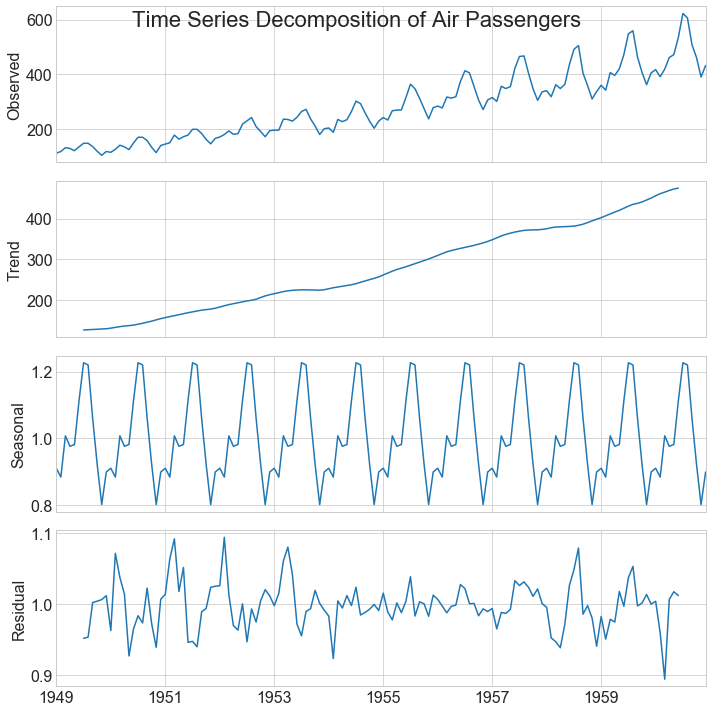

In [9]:
result=seasonal_decompose(df['value'],model='multiplicative')
plt.rcParams.update({'figure.figsize':(10,10)})

result.plot().suptitle('Time Series Decomposition of Air Passengers')
plt.show()

### Step 5 : Decorate Plots with Right Labels